# EDA

##### Import libraries

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Load data

In [6]:
posts = pd.read_csv('../data/subreddit_posts_combined.csv') 

In [11]:
posts = posts.drop_duplicates(subset='text', keep="first")

In [12]:
# drop duplicates didn't seem to work in webscrape notebook, so will save again here:
posts.to_csv('../data/subreddit_posts_combined.csv')

In [13]:
posts.head()

,author,created_utc,subreddit,timeframe,text,text_length,text_word_count
0,sub8321,1519141081,bulimia,pre-covid,Beginning my road to recovery...again : I am 3...,15177,2835
1,sub26364,1519096140,bulimia,pre-covid,Relapse related to ex : I've had bulimia for 1...,10426,1844
2,sub19288,1518983066,bulimia,pre-covid,Bulimia is Torture : Many people think it's so...,5127,991
3,sub23233,1518572435,bulimia,pre-covid,Drinking a lot : I have been purging with laxa...,9872,1909
4,sub21536,1518569824,bulimia,pre-covid,It sucks being a fat(ter) bulimic : When I fir...,22435,4330


### Submission Lengths

In [14]:
# Create a new column with submission length
posts['text_length'] = posts['text'].map(len)

In [15]:
# Create a new column with number of words per submission
posts['text_word_count'] = posts['text'].map(lambda x: len(x.split()))

In [16]:
# Show the shortest submissions 
posts.sort_values(by='text_word_count', ascending=True)[['text']].head()

,text
251,Anyone else feels like bulimia is a sort of se...
1208,"Adults with Bulimia, how do you see this disor..."
2356,Kidneys : Has anyone else had problems with th...
546,an audit-Curbing the urge to purge NOW : I was...
25687,"Kinda graphic, plus a question : So I just had..."


In [17]:
# Show the longest submissions
posts.sort_values(by='text_word_count', ascending=False)[['text']].head()

,text
727,My Girlfriend and I : My girlfriend is such an...
128,I had an episode today : Today I received a ca...
954,How do you STAY better? : Hey!\n\nI have been ...
4816,Eating disorder survey for research (chance to...
2486,"I need help : Hello my fellow humans, I have a..."


# Distribution of submission lengths

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


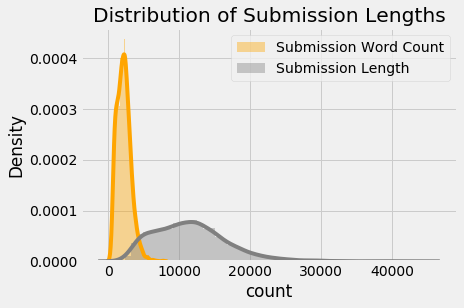

In [18]:
sns.distplot(posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
sns.distplot(posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("Distribution of Submission Lengths")
plt.legend();

In [19]:
# To do: look at pre and post covid and by disorder

## Unique users

In [20]:
# Find number of unique users for combined dataset.
posts['author'].describe()

count         3876
unique        2555
top       sub33605
freq            53
Name: author, dtype: object

In [21]:
# Look at number of submissions per user.
posts['author'].value_counts().head(20)

sub33605    53
sub17507    47
sub17688    31
sub26349    27
sub26259    17
sub22394    14
sub2240     13
sub30958    13
sub22438    13
sub7076     13
sub18017    12
sub5570     11
sub26494    11
sub9313     11
sub3697     10
sub25290    10
sub9116     10
sub28307    10
sub60       10
sub17689    10
Name: author, dtype: int64

## Plot most frequently used words

In [22]:
# create the transform
vectorizer = TfidfVectorizer()

In [31]:
text = posts['text']

In [32]:
vectors = vectorizer.fit_transform(text)

In [33]:
feature_names = vectorizer.get_feature_names()


In [34]:
dense = vectors.todense()


In [35]:
denselist = dense.tolist()


In [36]:
df = pd.DataFrame(denselist, columns=feature_names)


In [37]:
df.sum(axis=0).sort_values(ascending=False).head(15)


to      1302.341137
and     1288.898230
the      850.810112
my       802.938201
it       689.849855
of       587.879025
that     490.124536
me       488.129080
in       426.286635
but      410.998252
for      374.139949
is       372.602025
have     350.197386
this     347.848004
with     329.552864
dtype: float64

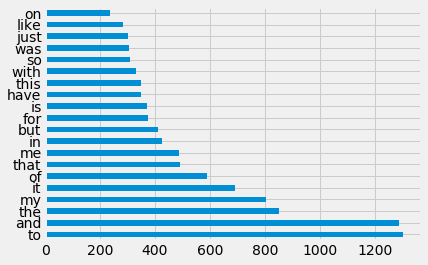

In [38]:
df.sum().sort_values(ascending=False).head(20).plot(kind='barh');


In [ ]:
# Go back and check Do this again but without the stop words in the text... 
# Also, waht is 'ni'?? Chekc this too... 